# Ramsey King
# DSC 630 - Predictive Analytics
# September 5, 2021
# Exercise 1.2

In [3]:
import pandas as pd
import numpy as np

blm_data = pd.read_csv('week1blsfile.csv')
blm_data.shape

(2513, 5)

The following categories were imported into the file:
- CES0500000002 - AVERAGE WEEKLY HOURS OF ALL EMPLOYEES - Total private
- CES2000000010 - WOMEN EMPLOYEES, THOUSANDS - Construction
- CES0000000001 - ALL EMPLOYEES, THOUSANDS - Total nonfarm
- CES3000000010 - WOMEN EMPLOYEES, THOUSANDS - Manufacturing
- CES3232500010 - WOMEN EMPLOYEES, THOUSANDS - Chemicals
- CES4142460010 - WOMEN EMPLOYEES, THOUSANDS - Chemicals
- CES4142470010 - WOMEN EMPLOYEES, THOUSANDS - Petroleum
- CES5000000010 - WOMEN EMPLOYEES, THOUSANDS - Information
- CES9000000010 - WOMEN EMPLOYEES, THOUSANDS - Government
- CEU0000000001 - ALL EMPLOYEES, THOUSANDS - Total nonfarm

For comparison purposes, we will delete all categories not named 'Women Employees, Thousands' from the data set

In [4]:
values_to_keep = ['CES2000000010', 'CES3000000010', 'CES3232500010', 'CES4142460010', 'CES4142470010', 'CES5000000010', 'CES9000000010']
tester = blm_data['Series ID'].isin(values_to_keep)
blm_data = blm_data[tester]
blm_data.shape

(1810, 5)

Then generate summary statistics for 2 variables, plot some of the features (e.g., histograms, box plots, density plots, etc.) of several variables, and save the data locally as CSV files.

In [10]:
# Summary statistics for the CES2000000010 and CES9000000010 variables
construction = blm_data[blm_data['Series ID'] == 'CES2000000010']
government = blm_data[blm_data['Series ID'] == 'CES9000000010']
print(construction.describe(), '\n', government.describe())

              Year        Value
count   259.000000   259.000000
mean   2010.297297   849.459459
std       6.245652    83.480173
min    2000.000000   707.000000
25%    2005.000000   799.000000
50%    2010.000000   838.000000
75%    2016.000000   928.500000
max    2021.000000  1014.000000 
               Year         Value
count   259.000000    259.000000
mean   2010.297297  12542.073359
std       6.245652    322.503300
min    2000.000000  11658.000000
25%    2005.000000  12346.000000
50%    2010.000000  12516.000000
75%    2016.000000  12802.500000
max    2021.000000  13191.000000


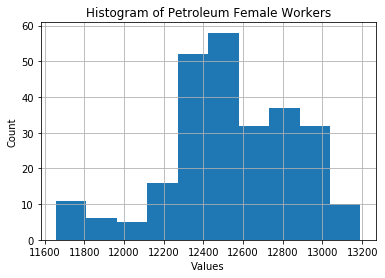

In [15]:
# plot some of the features (e.g., histograms, box plots, density plots, etc.) of several variables
import matplotlib.pyplot as plt
government['Value'].hist()
plt.title("Histogram of Government Female Workers")
plt.xlabel("Values")
plt.ylabel("Count")
plt.show()

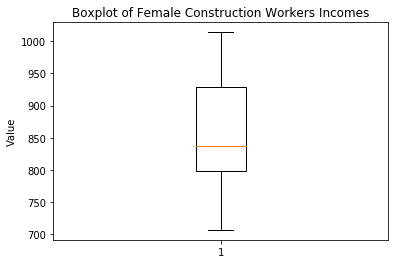

In [25]:
# plot some of the features (e.g., histograms, box plots, density plots, etc.) of several variables
import matplotlib.pyplot as plt

plt.boxplot(construction['Value'])
plt.title("Boxplot of Female Construction Workers Incomes")
plt.ylabel("Value")
plt.show()

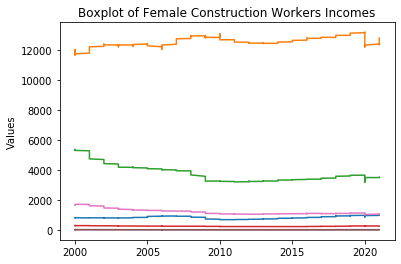

In [47]:
# plot some of the features (e.g., histograms, box plots, density plots, etc.) of several variables
import matplotlib.pyplot as plt

manufactoring = blm_data[blm_data['Series ID'] == 'CES3000000010']
chemicals_1 = blm_data[blm_data['Series ID'] == 'CES3232500010']
chemicals_2 = blm_data[blm_data['Series ID'] == 'CES4142460010']
petroleum = blm_data[blm_data['Series ID'] == 'CES4142470010']
information = blm_data[blm_data['Series ID'] == 'CES5000000010'] 


plt.plot(construction['Year'], construction['Value'])
plt.plot(government['Year'], government['Value'])
plt.plot(manufactoring['Year'], manufactoring['Value'])
plt.plot(chemicals_1['Year'], chemicals_1['Value'])
plt.plot(chemicals_2['Year'], chemicals_2['Value'])
plt.plot(petroleum['Year'], petroleum['Value'])
plt.plot(information['Year'], information['Value'])
plt.title("Boxplot of Female Construction Workers Incomes")
plt.ylabel("Values")
plt.show()

Explore Some Bivariate Relations
Use the same dataset within the same website to explore some bivariate relations (e.g. bivariate plot, correlation, table cross table etc.)

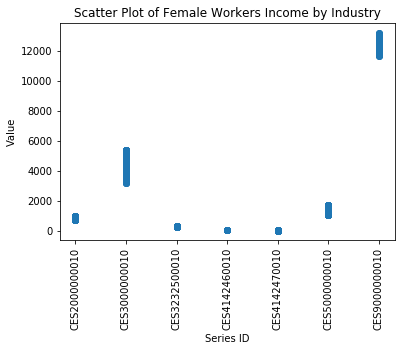

In [50]:
# Bivariate plot
plt.scatter(x=blm_data['Series ID'], y=blm_data['Value'])
plt.title("Scatter Plot of Female Workers Income by Industry")
plt.xlabel("Series ID")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.show()

In [57]:
# Correlation
# Will add a numeric column for months i.e. M01 = 1, M02 = 2, etc.
def month_counter(row, value):
    return value[row]

month_dict = {'M01': 1, 'M02': 2, 'M03': 3, 'M04': 4, 'M05': 5, 'M06': 6, 'M07': 7, 'M08': 8, 'M09': 9, 'M10':10, 'M11':11, 'M12':12}
blm_data['Month_Num'] = blm_data['Period'].apply(month_counter, args= (month_dict,))
blm_data.corr(method='pearson')

,Year,Value,Month_Num
Year,1.000000,-0.012419,-0.034230
Value,-0.012419,1.000000,-0.000364
Month_Num,-0.034230,-0.000364,1.000000


In [59]:
# cross tab or pivot table data
pd.pivot_table(blm_data, index='Series ID', values='Value')

,Value
Series ID,
CES2000000010,849.459459
CES3000000010,3805.308880
CES3232500010,271.826357
CES4142460010,38.508915
CES4142470010,32.259302
CES5000000010,1242.239382
CES9000000010,12542.073359


Organize a Data Report
Generate a summary report. Make sure to include: summary for every variable, structure and type of data elements, discuss four results of your data.

In [60]:
blm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1810 entries, 444 to 2253
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Series ID  1810 non-null   object 
 1   Year       1810 non-null   int64  
 2   Period     1810 non-null   object 
 3   Label      1810 non-null   object 
 4   Value      1810 non-null   float64
 5   Month_Num  1810 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 99.0+ KB
